# Momentum-Based/Trend-Following Strategies

## Rolling Window Mean Strategy

In [7]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 90
    set_commission(PerTrade(cost=5)) 


def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")           
    order_target_percent(context.stock, 1.0 if price_hist[-1] > price_hist.mean() else 0.0) 

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2000-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date.tz_localize(None), end = end_date.tz_localize(None), initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

DateOutOfBounds: Parameter `end` receieved as '2025-12-01 00:00:00' although cannot be later than the last session of calendar 'XNYS' ('2025-11-28 00:00:00').

## Simple Moving Averages Strategy

In [6]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 90 
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")          
    
    rolling_mean_short_term = price_hist.rolling(window=45, center=False).mean()
    rolling_mean_long_term = price_hist.rolling(window=90, center=False).mean()
    
    if rolling_mean_short_term[-1] > rolling_mean_long_term[-1]:
        order_target_percent(context.stock, 1.0)     
    elif rolling_mean_short_term[-1] < rolling_mean_long_term[-1]:
        order_target_percent(context.stock, 0.0)     

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2000-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

ModuleNotFoundError: No module named 'pyfolio'

## Exponentially-Weighted Moving Averages Strategy

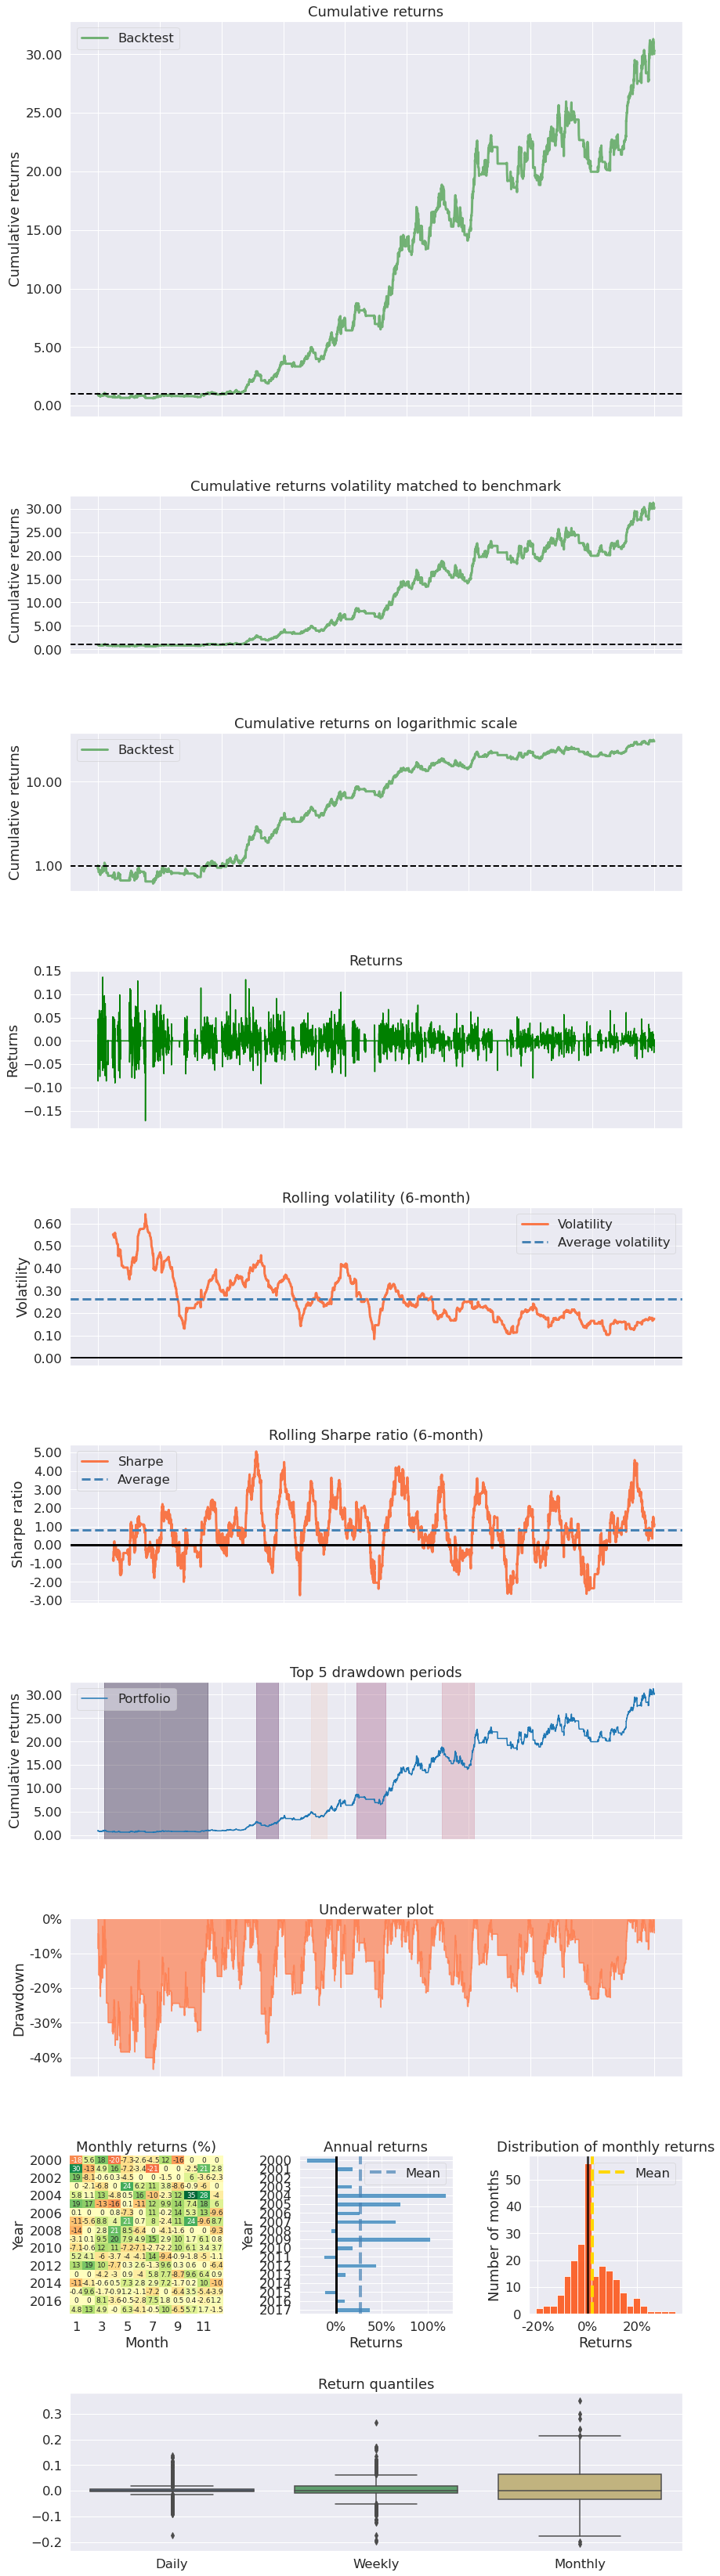

In [3]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 90
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")          
    
    rolling_mean_short_term = price_hist.ewm(span=5,adjust=True,ignore_na=True).mean()
    rolling_mean_long_term = price_hist.ewm(span=30,adjust=True,ignore_na=True).mean()
    
    if rolling_mean_short_term[-1] > rolling_mean_long_term[-1]:
        order_target_percent(context.stock, 1.0)     
    elif rolling_mean_short_term[-1] < rolling_mean_long_term[-1]:
        order_target_percent(context.stock, 0.0)     

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2000-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## RSI Strategy

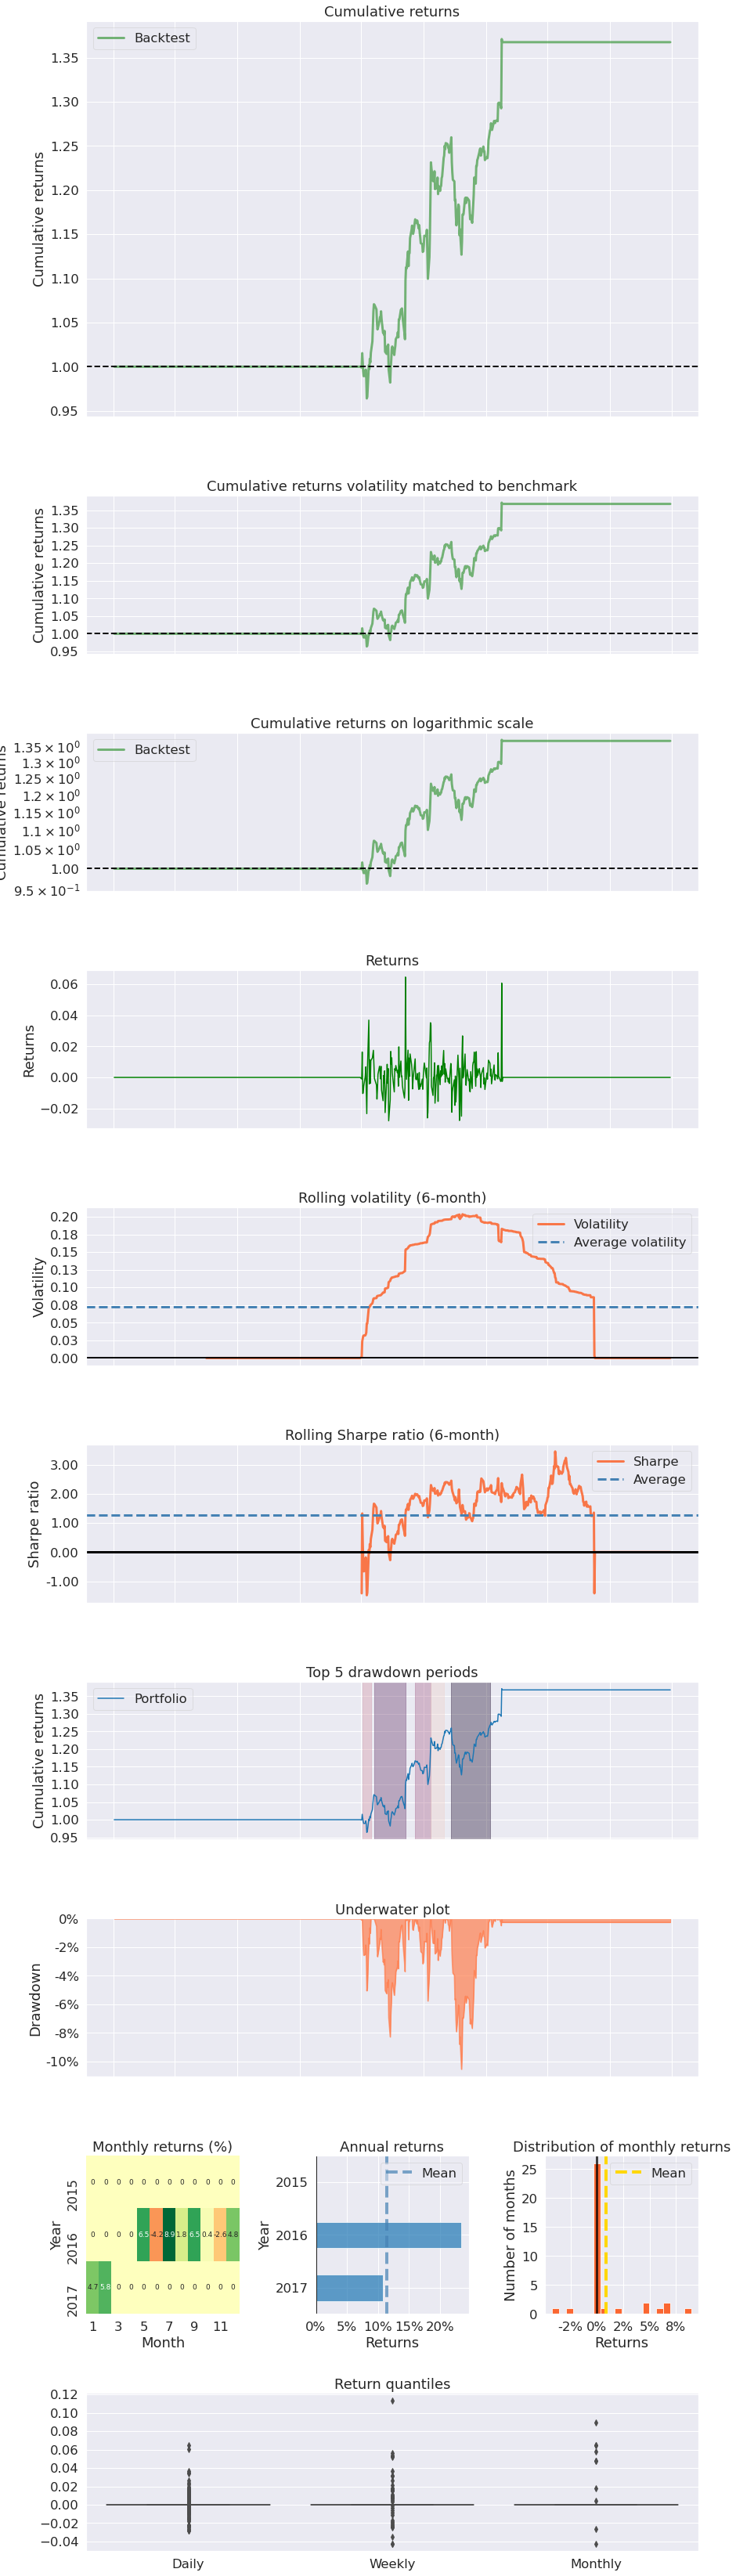

In [4]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from stockstats import StockDataFrame as sdf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 20
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, ["open", "high", "low","close"], context.rolling_window, "1d")             
    
    stock=sdf.retype(price_hist)   

    rsi = stock.get('rsi_12')
    
    if rsi[-1] > 90:
        order_target_percent(context.stock, 0.0)     
    elif rsi[-1] < 10:
        order_target_percent(context.stock, 1.0)   
        
def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2015-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## MACD Crossover Strategy

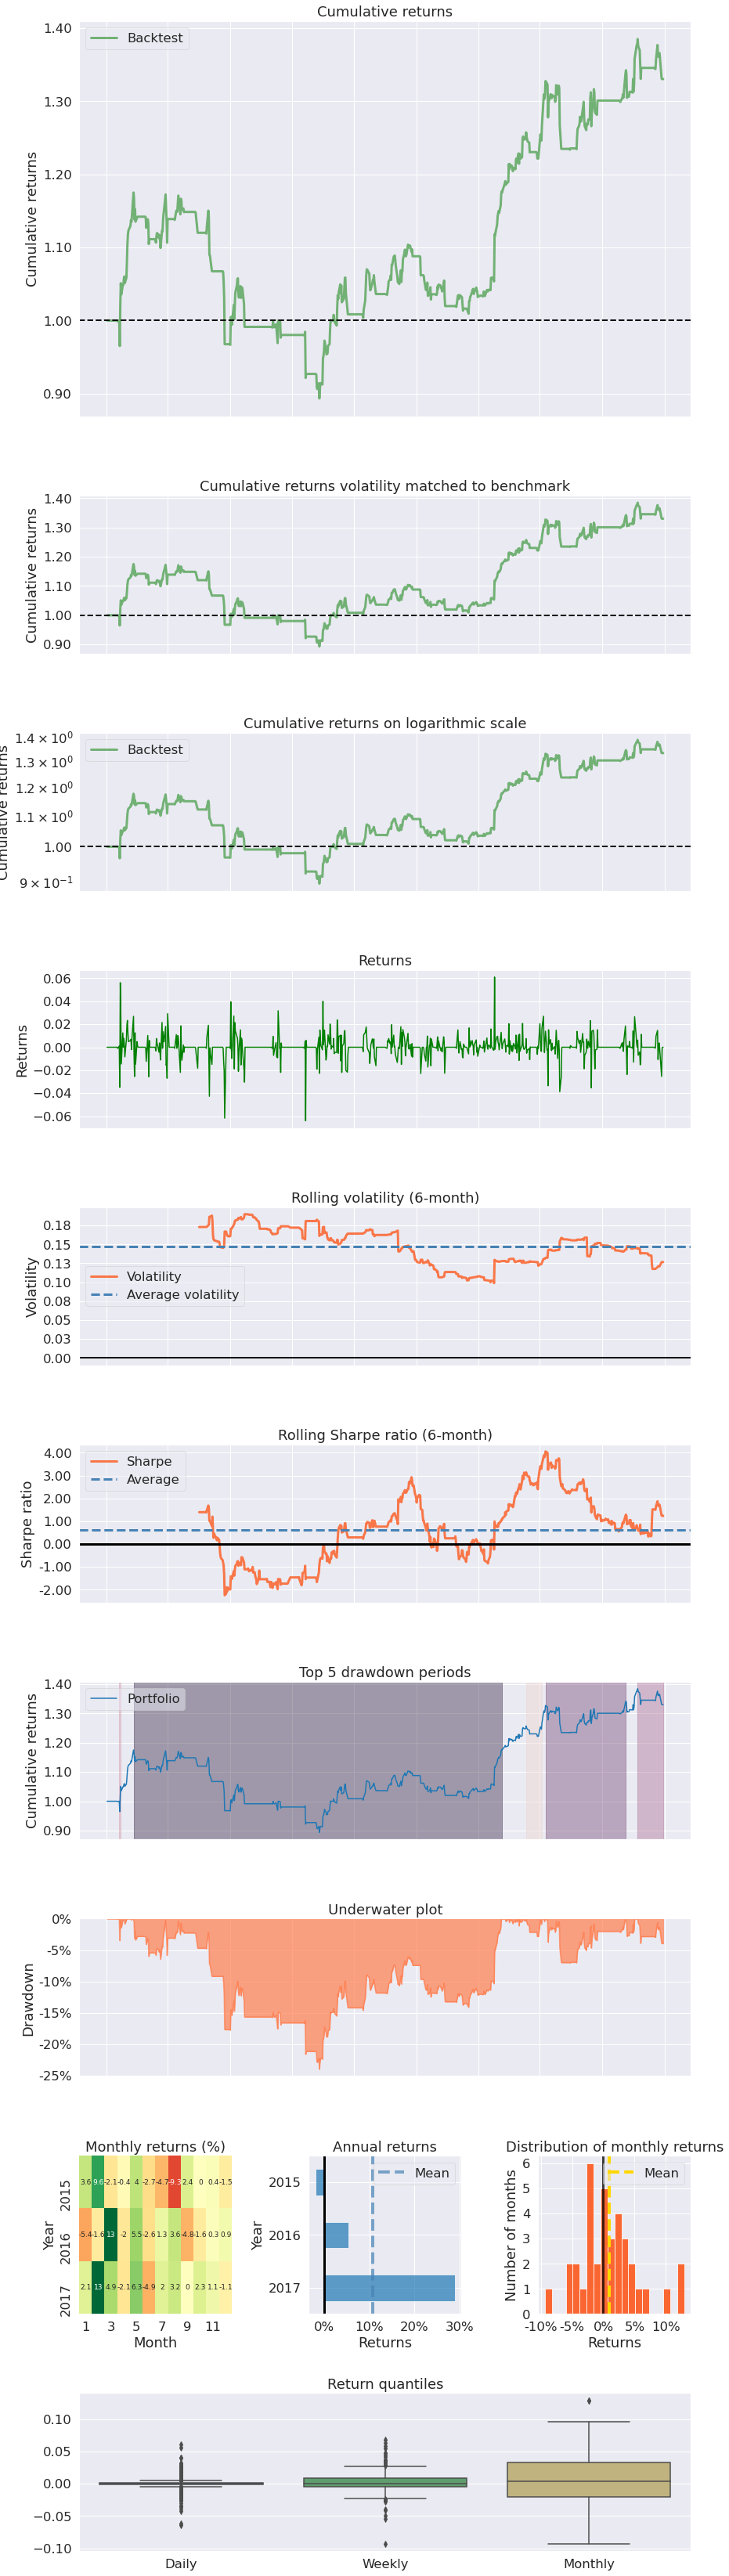

In [5]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from stockstats import StockDataFrame as sdf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 20
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, ["open", "high", "low","close"], context.rolling_window, "1d")             
    
    stock=sdf.retype(price_hist)   

    signal = stock['macds']
    macd   = stock['macd'] 
    
    if macd[-1] > signal[-1] and macd[-2] <= signal[-2]:
        order_target_percent(context.stock, 1.0)     
    elif macd[-1] < signal[-1] and macd[-2] >= signal[-2]:
        order_target_percent(context.stock, 0.0)   
        
def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2015-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## RSI + MACD Strategy

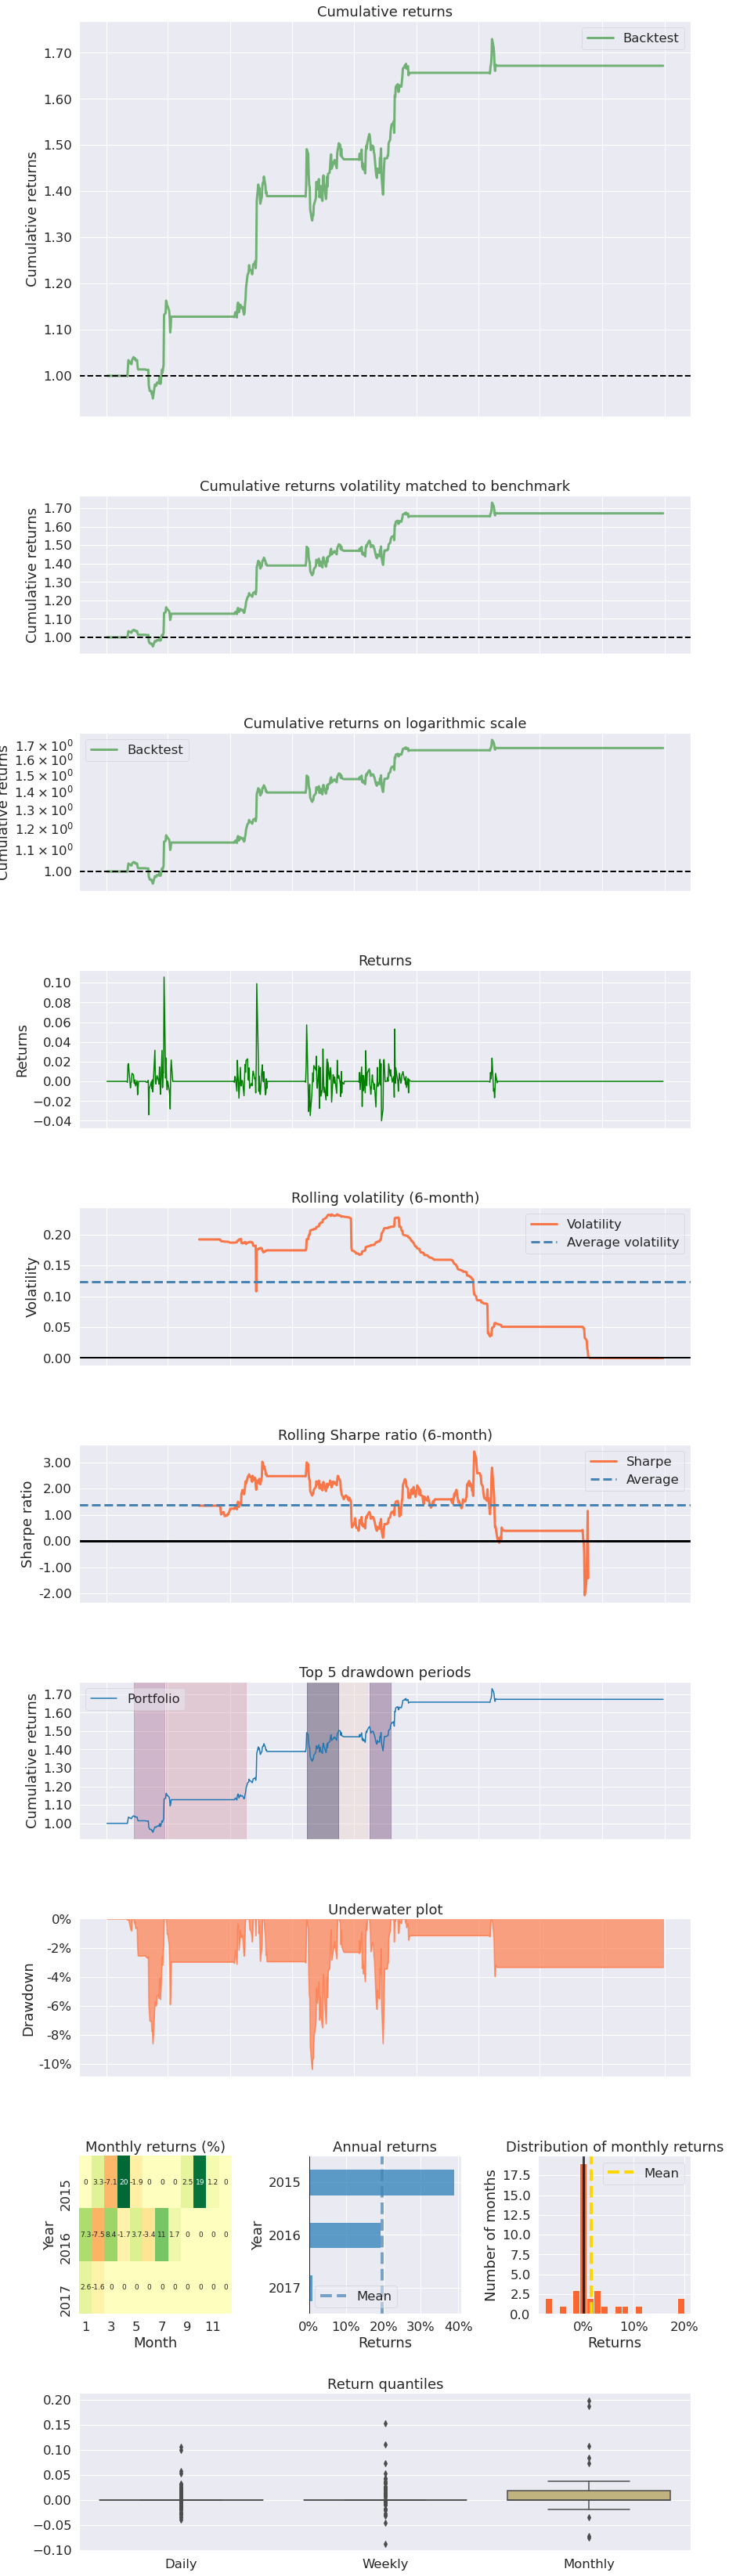

In [6]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from stockstats import StockDataFrame as sdf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('MSFT')
    context.rolling_window = 20
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, ["open", "high", "low","close"], context.rolling_window, "1d")             
    
    stock=sdf.retype(price_hist)   

    rsi = stock.get('rsi_12')
       
    signal = stock['macds']
    macd   = stock['macd'] 
        
    if rsi[-1] < 50 and macd[-1] > signal[-1] and macd[-2] <= signal[-2]:
        order_target_percent(context.stock, 1.0)     
    elif rsi[-1] > 50 and macd[-1] < signal[-1] and macd[-2] >= signal[-2]:
        order_target_percent(context.stock, 0.0)   
        
def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2015-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## Triple Exponential Average (TRIX) Strategy

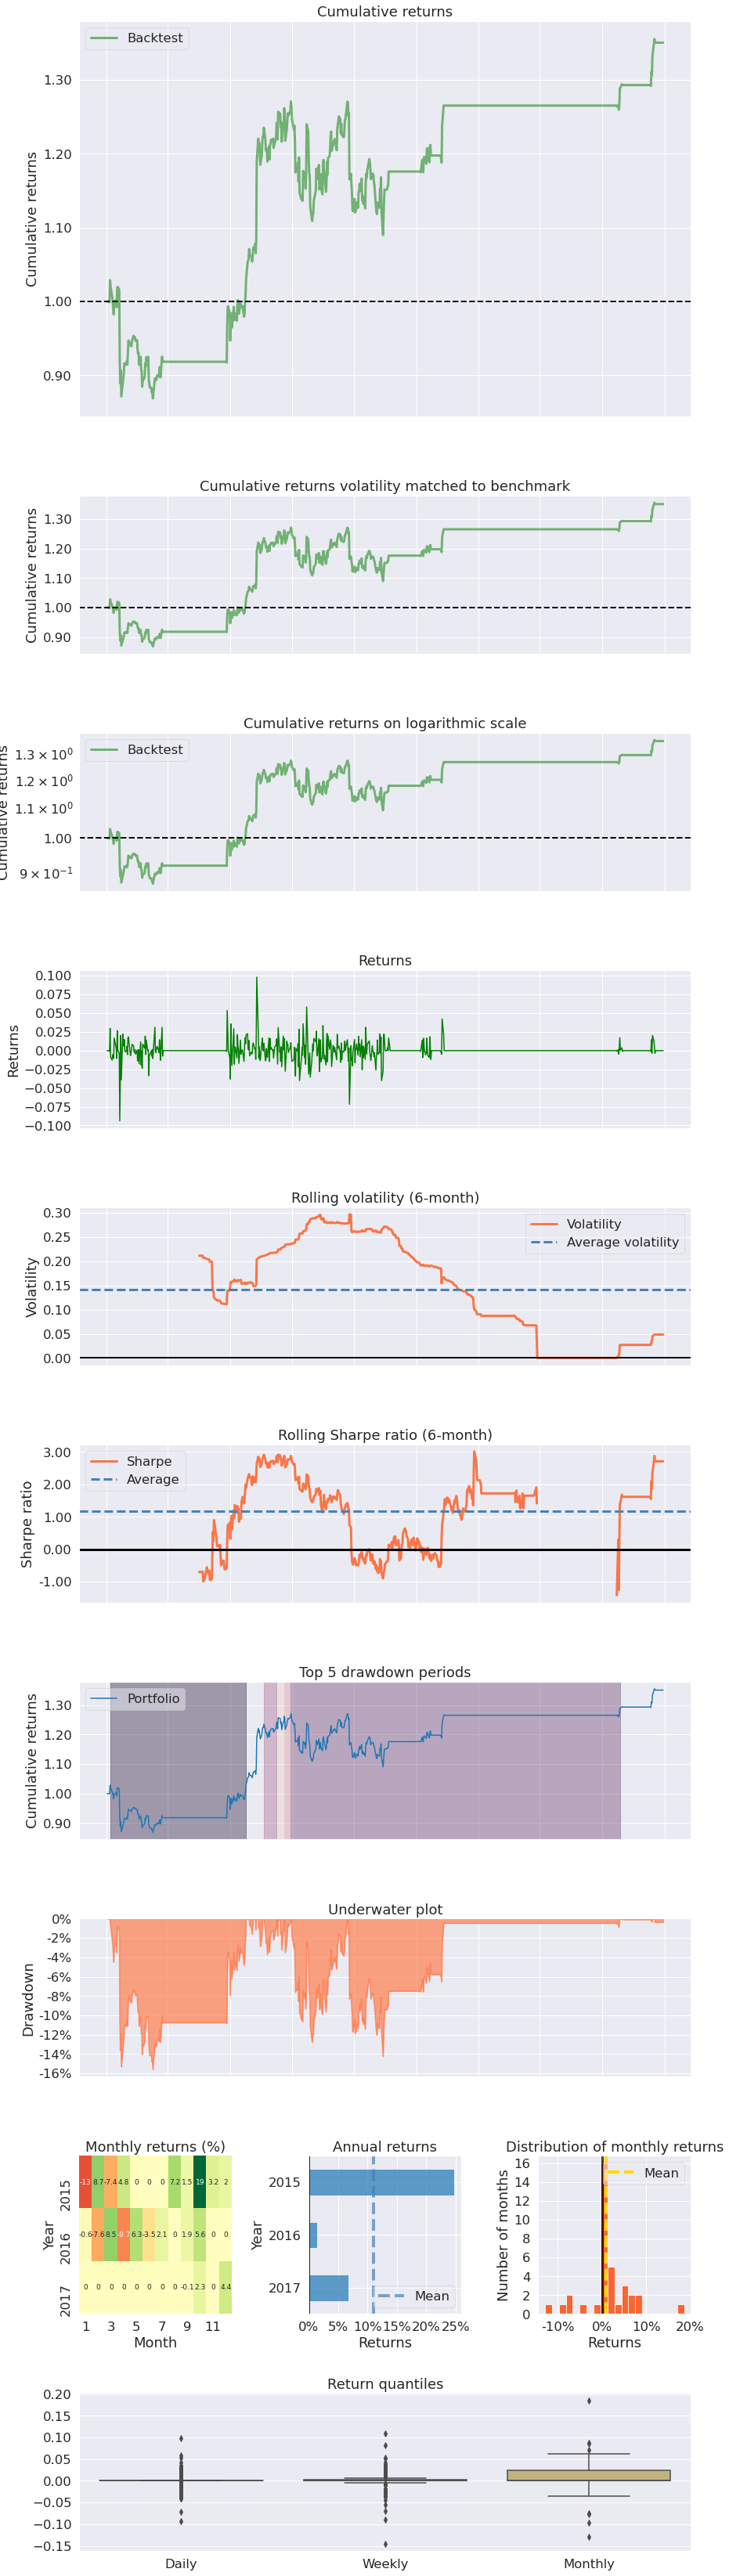

In [7]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from stockstats import StockDataFrame as sdf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('MSFT')
    context.rolling_window = 20
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, ["open", "high", "low","close"], context.rolling_window, "1d")             
    
    stock=sdf.retype(price_hist)   

    trix = stock.get('trix')
    
    if trix[-1] > 0 and trix[-2] < 0:
        order_target_percent(context.stock, 0.0)     
    elif trix[-1] < 0 and trix[-2] > 0:
        order_target_percent(context.stock, 1.0)   
        
def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2015-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## Williams %R Strategy

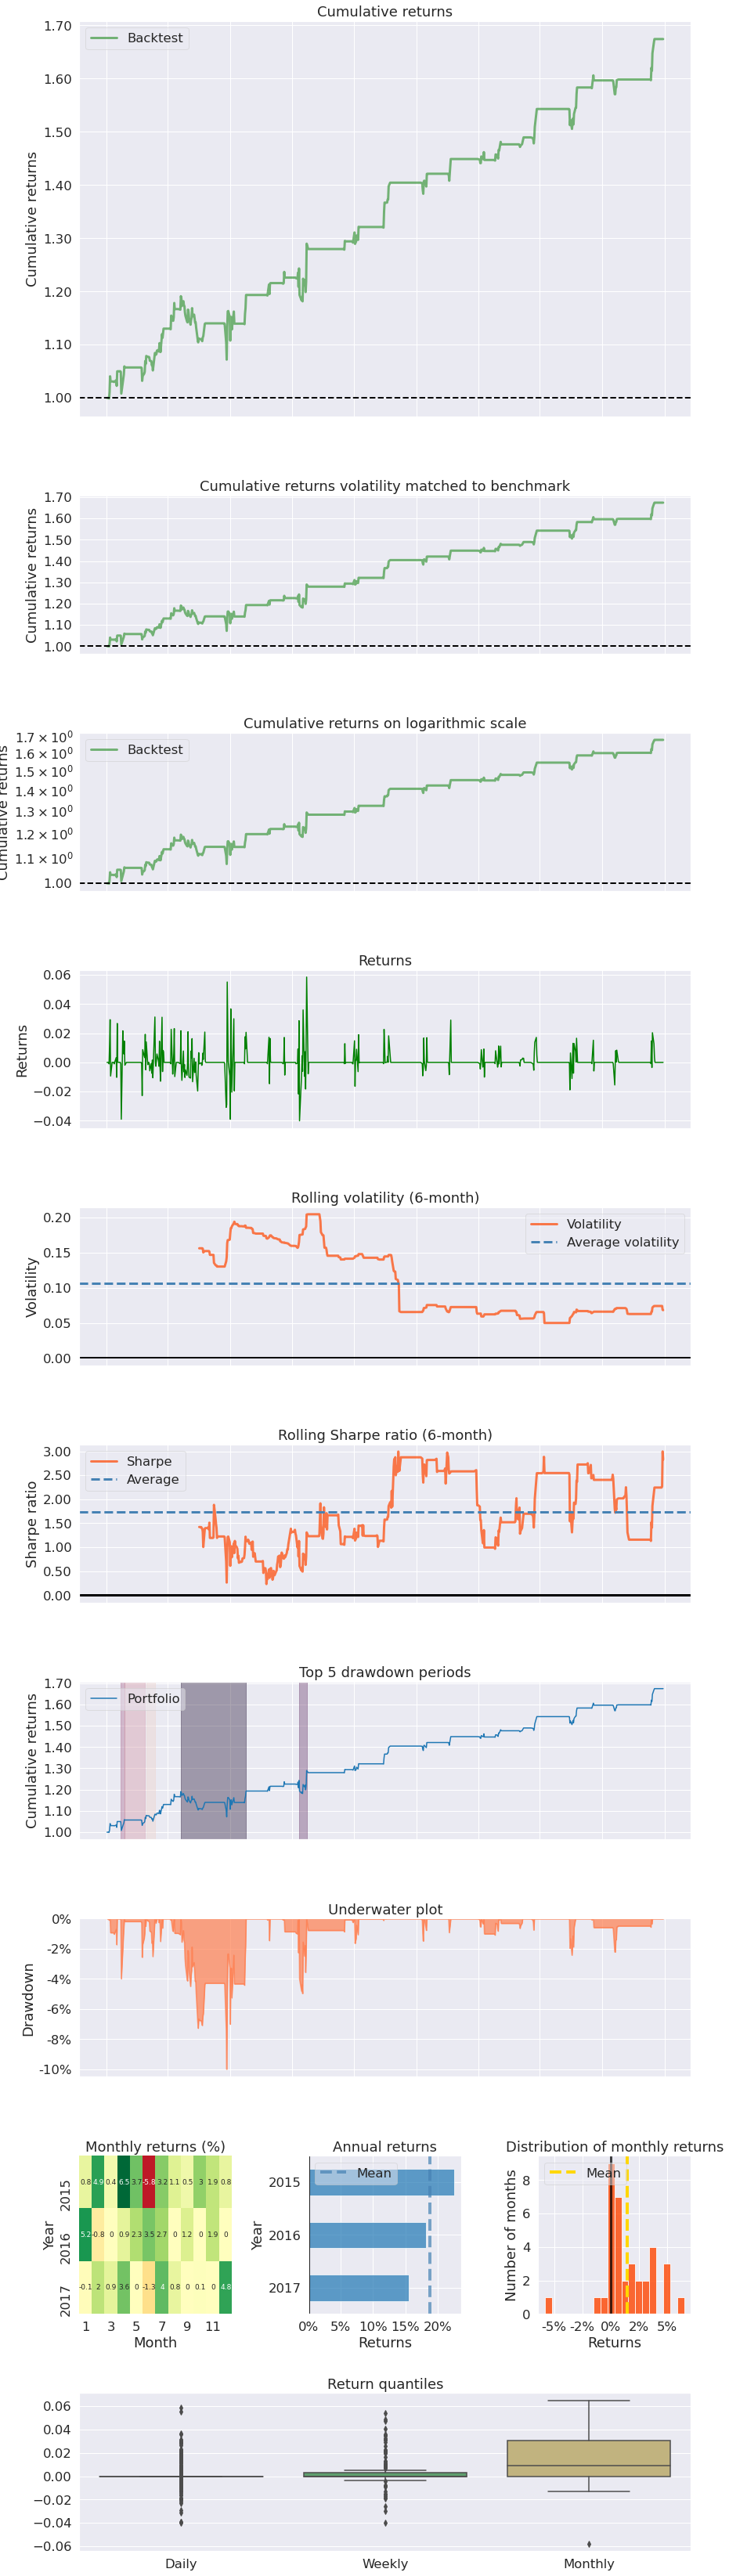

In [8]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from stockstats import StockDataFrame as sdf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('MSFT')
    context.rolling_window = 20
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, ["open", "high", "low","close"], context.rolling_window, "1d")             
    
    stock=sdf.retype(price_hist)   

    wr = stock.get('wr_6')
    
    if wr[-1] < 10:
        order_target_percent(context.stock, 0.0)     
    elif wr[-1] > 90:
        order_target_percent(context.stock, 1.0)   
        
def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2015-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

# Mean Reversion Strategies

## Bollinger Band Trading Strategy

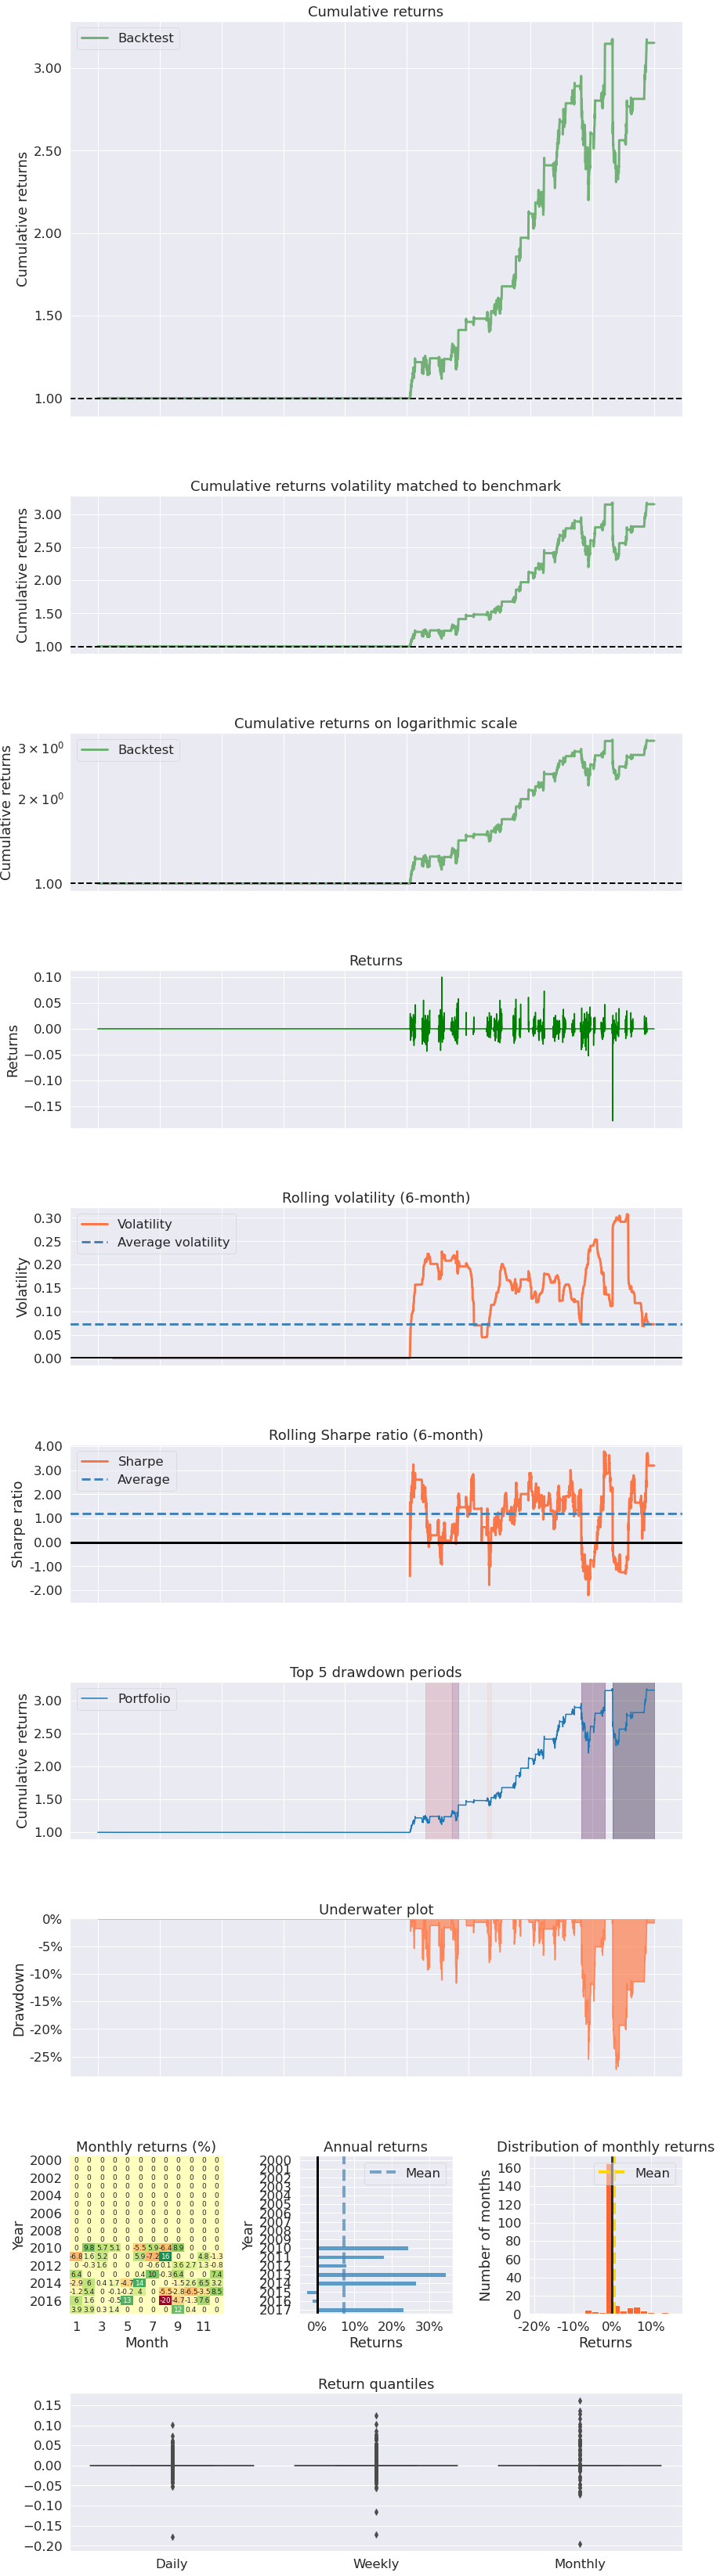

In [9]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('DG')
    context.rolling_window = 20 
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")          
    
    middle_base_line = price_hist.mean()
    std_line =  price_hist.std()
    lower_band = middle_base_line - 2 * std_line
    upper_band = middle_base_line + 2 * std_line
   
    if price_hist[-1] < lower_band:
        order_target_percent(context.stock, 1.0)     
    elif price_hist[-1] > upper_band:
        order_target_percent(context.stock, 0.0)     

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2000-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## Pairs-Trading Strategy

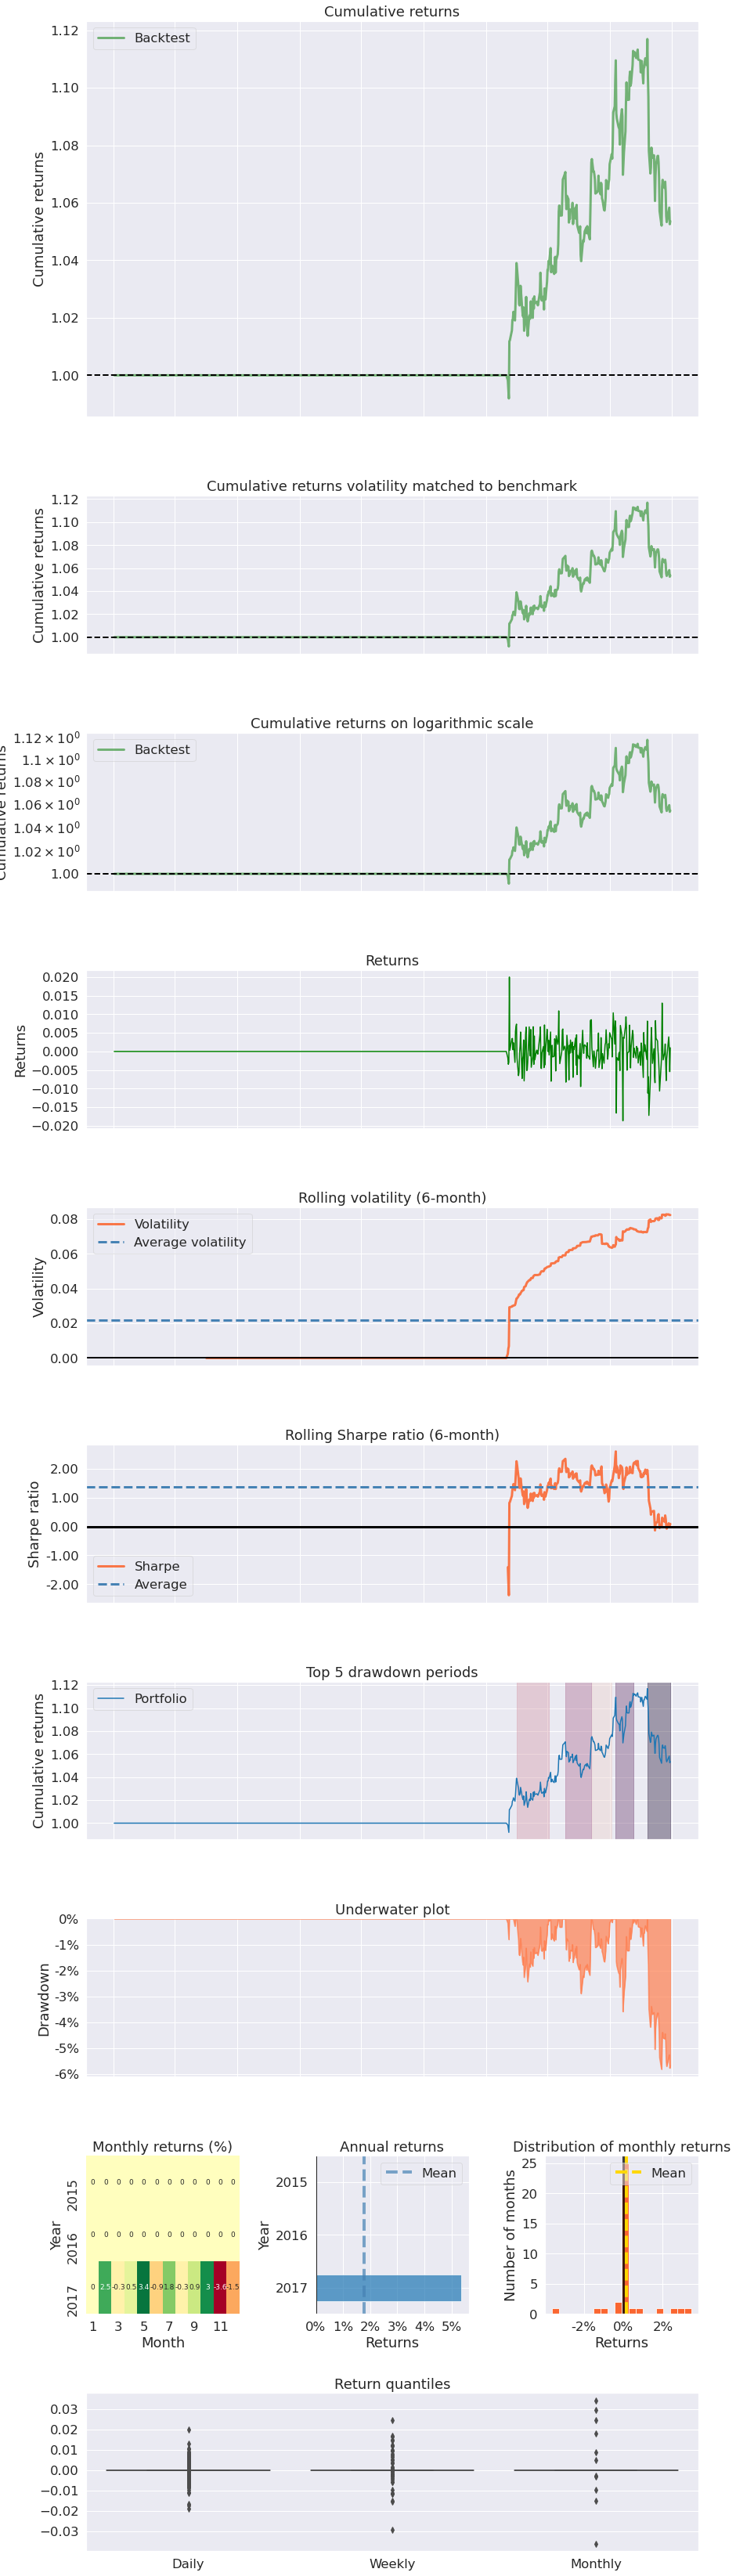

In [10]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint


import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock_x = symbol('PEP')
    context.stock_y = symbol('KO')
    context.rolling_window = 500
    set_commission(PerTrade(cost=5))       
    context.i = 0
    
def handle_data(context, data):   
    context.i += 1
    if context.i < context.rolling_window:
        return
    
    try:
        x_price = data.history(context.stock_x, "close", context.rolling_window, "1d")
        x = np.log(x_price)
        
        y_price = data.history(context.stock_y, "close", context.rolling_window, "1d")
        y = np.log(y_price)

        _, p_value, _  = coint(x, y)
        if p_value < .9:
            return
        
        slope, intercept = sm.OLS(y, sm.add_constant(x, prepend=True)).fit().params
        
        spread = y - (slope * x + intercept)
        zscore = (spread[-1] - spread.mean()) / spread.std()    
        
        if -1 < zscore < 1:
            return

        side = np.copysign(0.5, zscore)
        order_target_percent(context.stock_y, -side * 100 / y_price[-1])
        order_target_percent(context.stock_x,  side * slope * 100 / x_price[-1])    
    except:
        pass

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2015-1-1', utc=True)
end_date = pd.to_datetime('2018-01-01', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')


# Mathematical Model Based Strategies

## Minimization of Portfolio Volatility Strategy with Monthly Trading

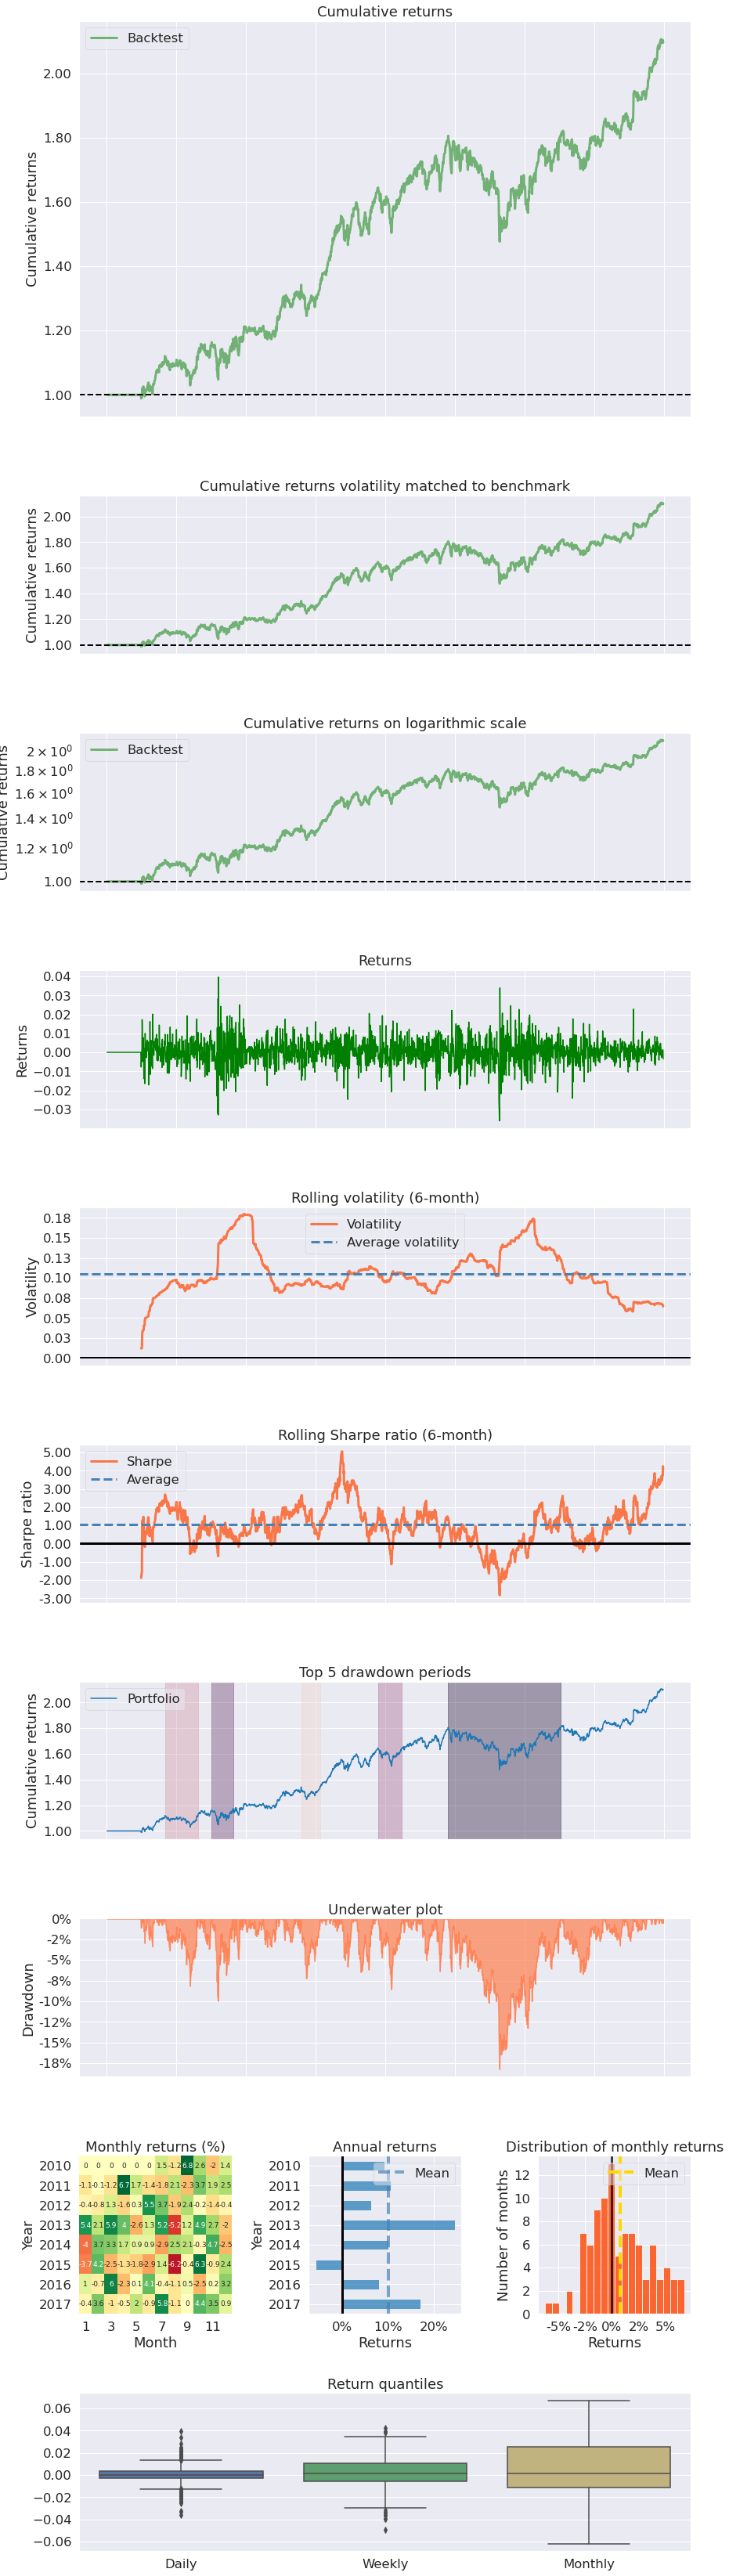

In [11]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission, schedule_function, date_rules, time_rules
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from scipy.optimize import minimize
import numpy as np

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stocks = [symbol('DIS'),symbol('WMT'),symbol('DOW'),symbol('CRM'),symbol('NKE'),symbol('HD'),symbol('V'),symbol('MSFT'),symbol('MMM'),symbol('CSCO'),symbol('KO'),symbol('AAPL'),symbol('HON'),symbol('JNJ'),symbol('TRV'),symbol('PG'),symbol('CVX'),symbol('VZ'),symbol('CAT'),symbol('BA'),symbol('AMGN'),symbol('IBM'),symbol('AXP'),symbol('JPM'),symbol('WBA'),symbol('MCD'),symbol('MRK'),symbol('GS'),symbol('UNH'),symbol('INTC')]
    context.rolling_window = 200
    set_commission(PerTrade(cost=5))
    schedule_function(handle_data, date_rules.month_end(), time_rules.market_open(hours=1))
    
def minimum_vol_obj(wo, cov):
    w = wo.reshape(-1, 1)
    sig_p = np.sqrt(np.matmul(w.T, np.matmul(cov, w)))[0, 0]
    return sig_p

def handle_data(context, data): 
    n_stocks = len(context.stocks)
    prices = None
    
    for i in range(n_stocks):
        price_history = data.history(context.stocks[i], "close", context.rolling_window, "1d")
        
        price = np.array(price_history)
        if prices is None:
            prices = price
        else:
            prices = np.c_[prices, price]
    
    rets = prices[1:,:]/prices[0:-1, :]-1.0
    mu = np.mean(rets, axis=0)
    cov = np.cov(rets.T)    
           
    w0 = np.ones(n_stocks) / n_stocks
    
    cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}, {'type': 'ineq', 'fun': lambda w: w})
    TOL = 1e-12    
    res = minimize(minimum_vol_obj, w0, args=cov, method='SLSQP', constraints=cons, tol=TOL, options={'disp': False})
    
    if not res.success:
        return;
    
    w = res.x
    
    for i in range(n_stocks):
        order_target_percent(context.stocks[i], w[i])    

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2010-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## Maximum Sharpe Ratio Strategy with Monthly Trading 

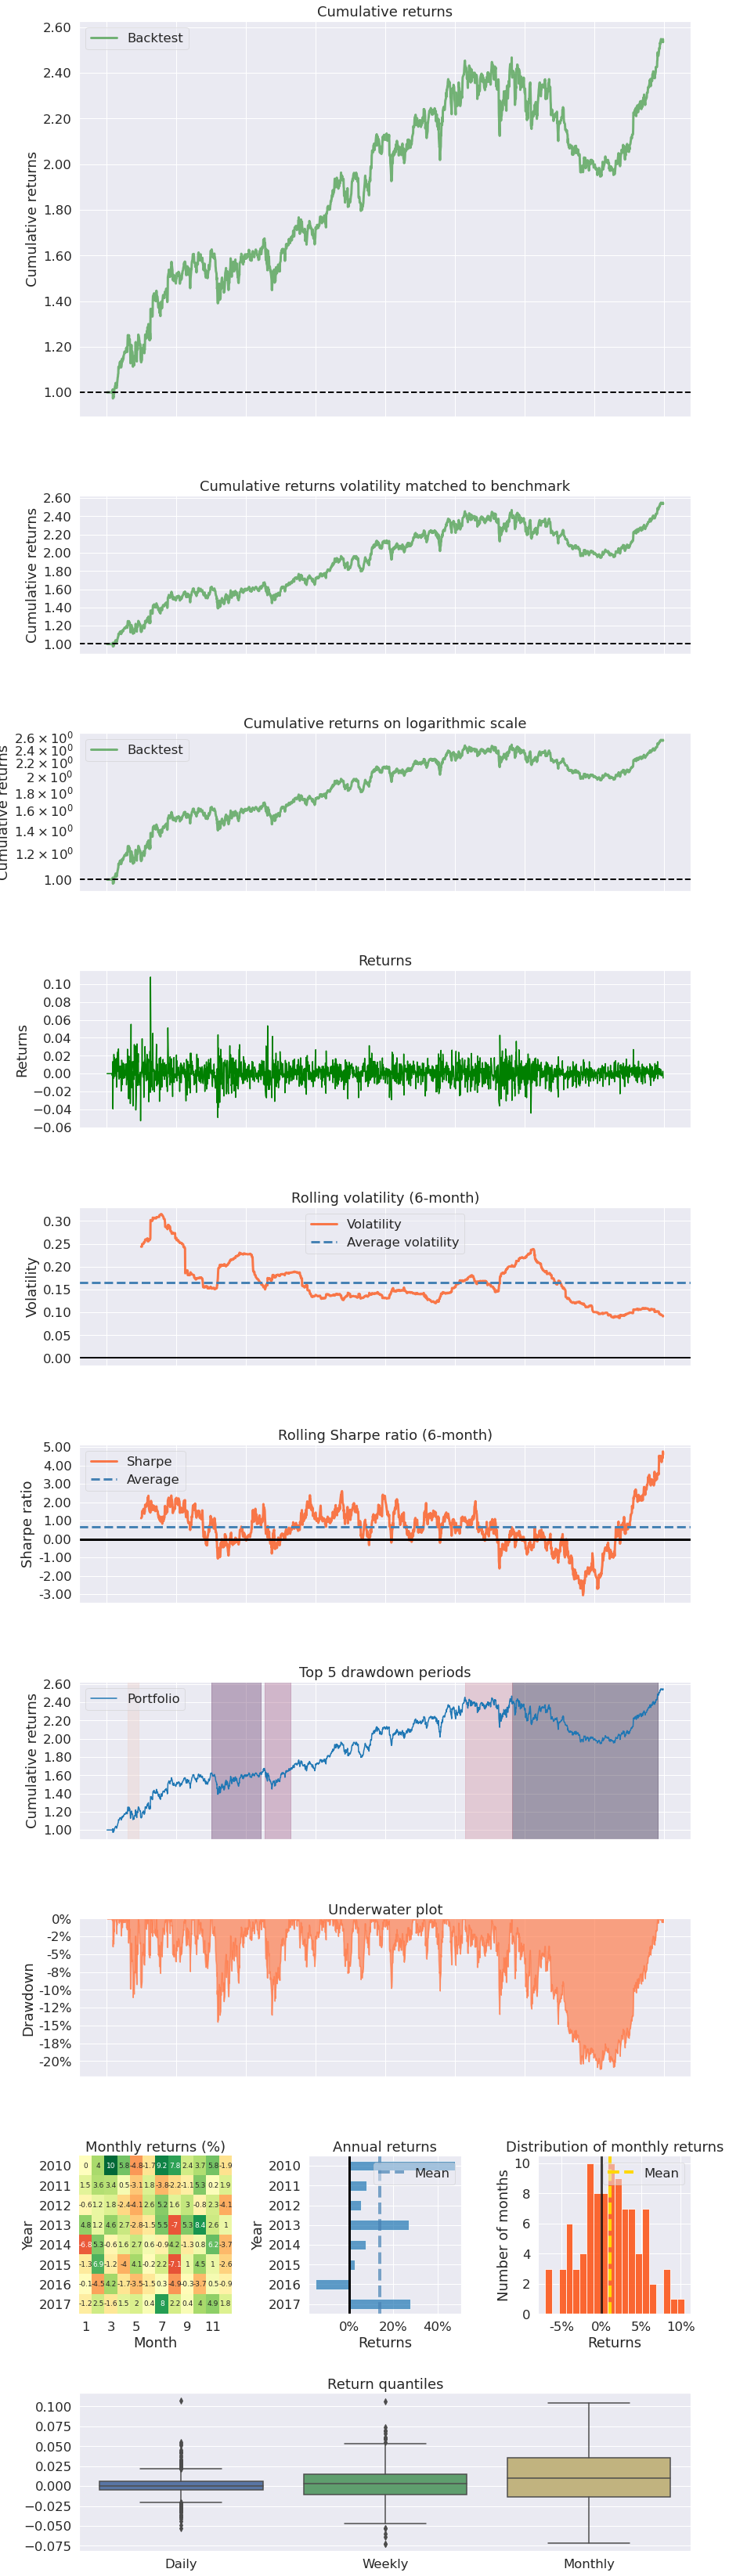

In [12]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbols, set_commission, schedule_function, date_rules, time_rules
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stocks = symbols('DIS','WMT','DOW','CRM','NKE','HD','V','MSFT','MMM','CSCO','KO','AAPL','HON','JNJ','TRV','PG','CVX','VZ','CAT','BA','AMGN','IBM','AXP','JPM','WBA','MCD','MRK','GS','UNH','INTC')
    context.rolling_window = 252
    set_commission(PerTrade(cost=5))
    schedule_function(handle_data, date_rules.month_end(), time_rules.market_open(hours=1))
    
def handle_data(context, data): 
    prices_history = data.history(context.stocks, "close", context.rolling_window, "1d")
    avg_returns = expected_returns.mean_historical_return(prices_history)
    cov_mat = risk_models.sample_cov(prices_history)

    efficient_frontier = EfficientFrontier(avg_returns, cov_mat)
    weights = efficient_frontier.max_sharpe()
    cleaned_weights = efficient_frontier.clean_weights()
    
    for stock in context.stocks:
        order_target_percent(stock, cleaned_weights[stock])

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2010-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

# Time Series Prediction Based Strategies

## SARIMAX Strategy

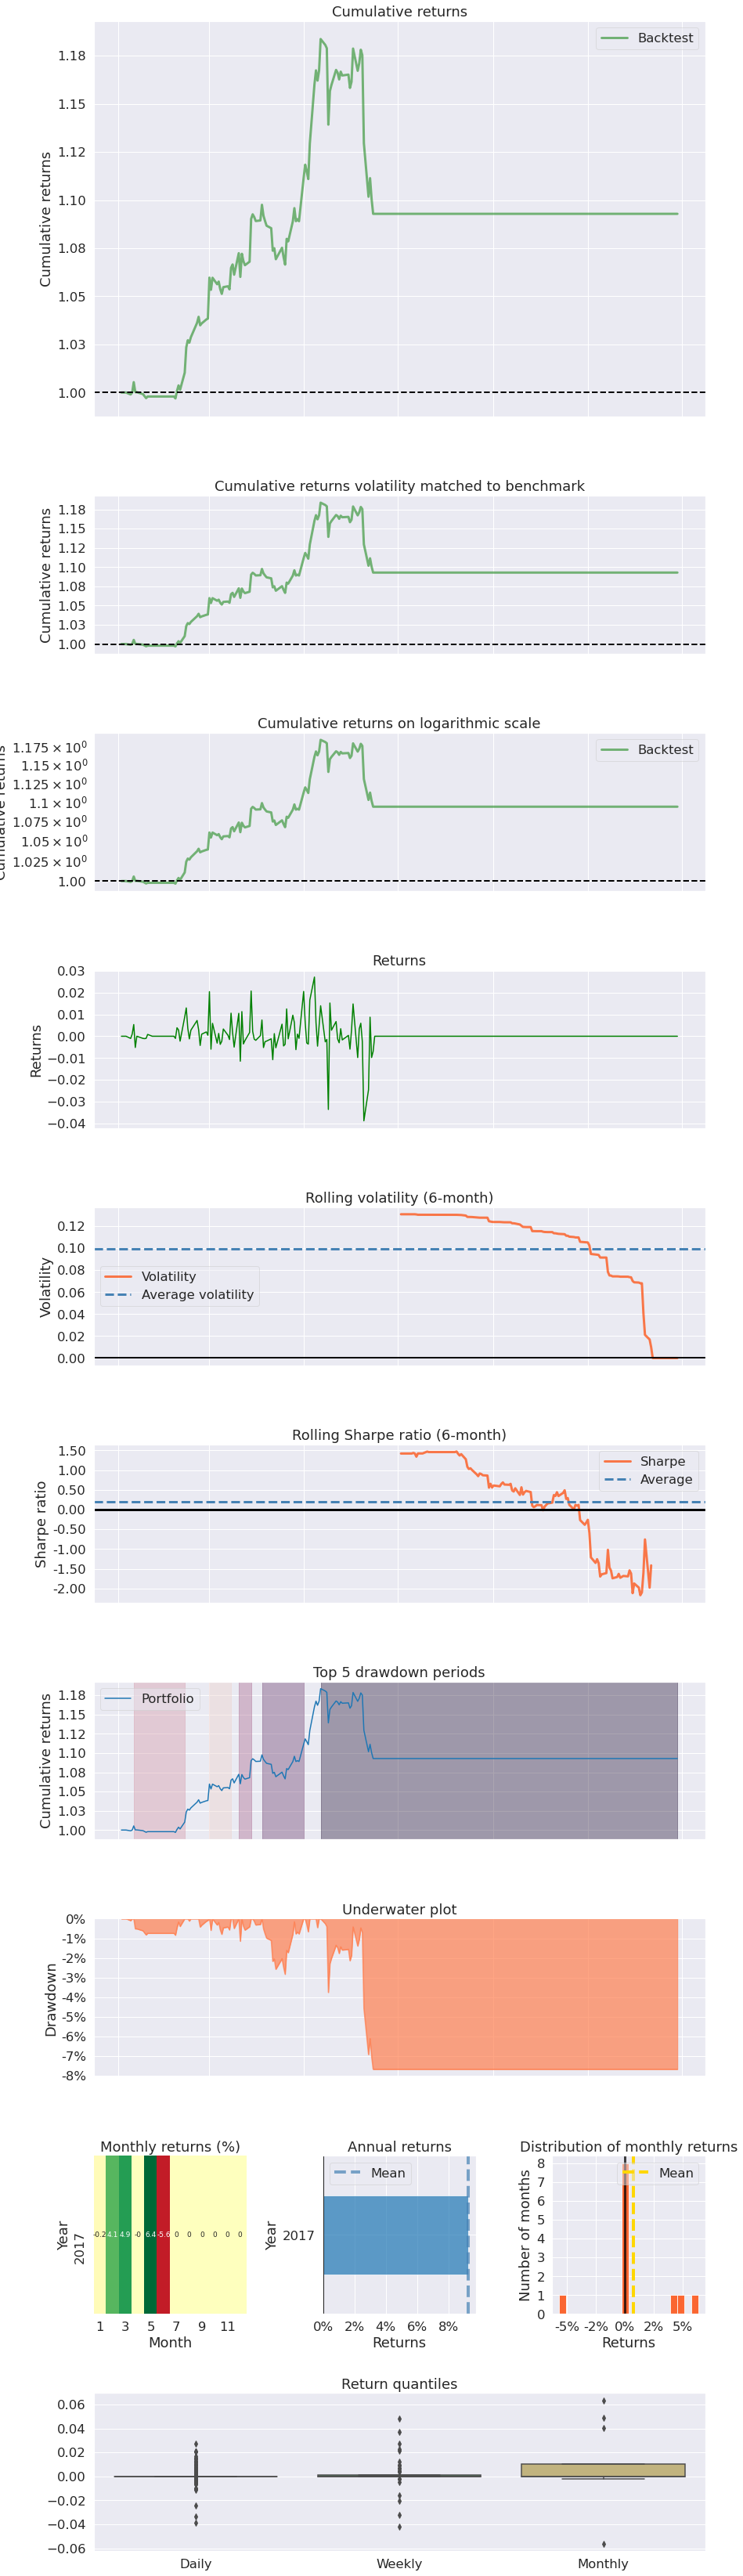

In [13]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
import pmdarima as pm

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 90
    set_commission(PerTrade(cost=5)) 


def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")               
    try:
        model = pm.auto_arima(price_hist, seasonal=True)
        forecasts = model.predict(7)      
        order_target_percent(context.stock, 1.0 if price_hist[-1] < forecasts[-1] else 0.0) 
    except:
        pass

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2017-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## Prophet Strategy

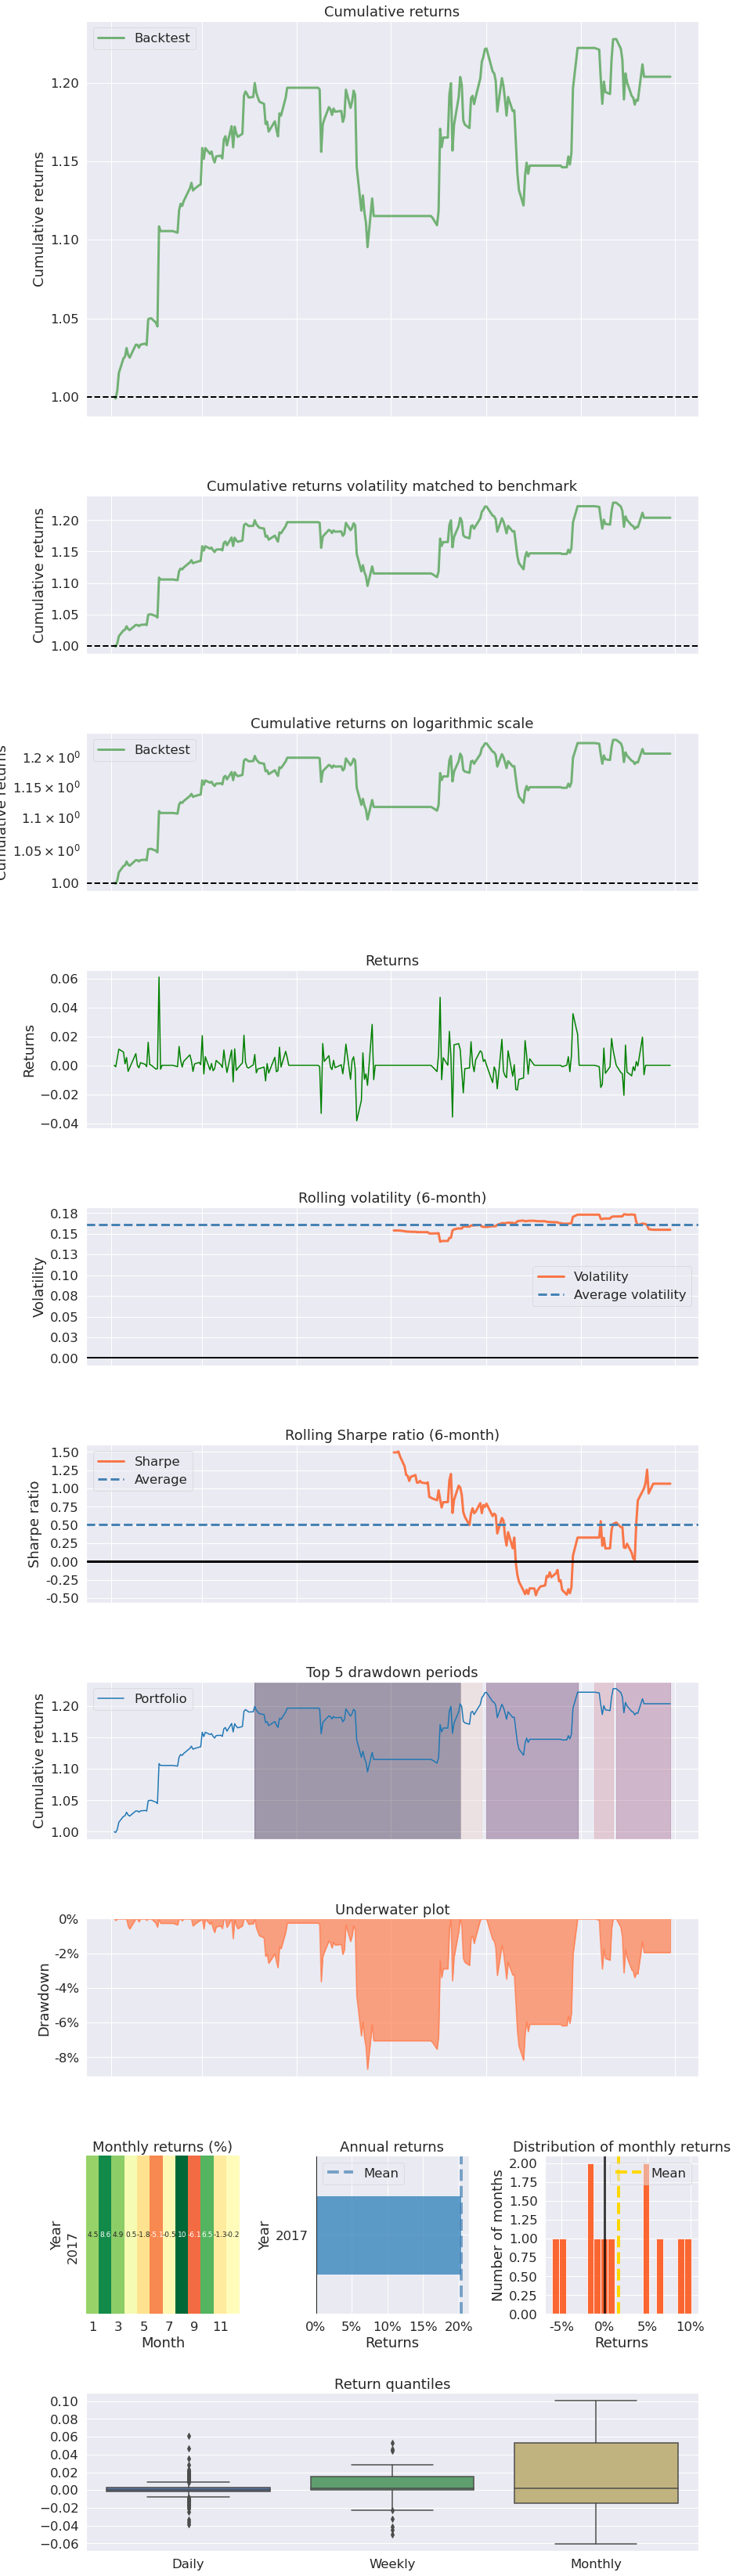

In [15]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from fbprophet import Prophet
import logging

logging.getLogger('fbprophet').setLevel(logging.WARNING)

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 90
    set_commission(PerTrade(cost=5)) 


def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")               
    
    price_df = pd.DataFrame({'y' : price_hist}).rename_axis('ds').reset_index()
    price_df['ds'] = price_df['ds'].dt.tz_convert(None)
        
    model = Prophet()
    model.fit(price_df)
    df_forecast = model.make_future_dataframe(periods=7, freq='D')
    df_forecast = model.predict(df_forecast)
    
    last_price=price_hist[-1]
    forecast_lower=df_forecast['yhat_lower'].iloc[-1]       
    forecast_upper=df_forecast['yhat_upper'].iloc[-1]
        
    if last_price < forecast_lower:
        order_target_percent(context.stock, 1.0) 
    elif last_price > forecast_upper:
        order_target_percent(context.stock, 0.0) 

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
start_date = pd.to_datetime('2017-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')